Lucas Derveaux, Tibo Vandercruyssen and Bavo Persyn



# Division of labor ##

We did this entire project once again together with pair programming.
We got together (virtualy or in real life) and worked together, looking for solutions. Everyone did about a third of the work.


# Data preprocessing

Import the right libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

import warnings
warnings.filterwarnings('ignore')


Clone GitHub repository, so we can use the given images

In [2]:
!git clone https://github.com/tibovdc/ProjectML.git

Cloning into 'ProjectML'...
remote: Enumerating objects: 10749, done.
remote: Total 10749 (delta 0), reused 0 (delta 0), pack-reused 10749
Receiving objects: 100% (10749/10749), 400.27 MiB | 21.26 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Checking out files: 100% (10247/10247), done.


Show 1 image from GitHub

In [3]:
 !pip install -q mediapy

10015215 - image0

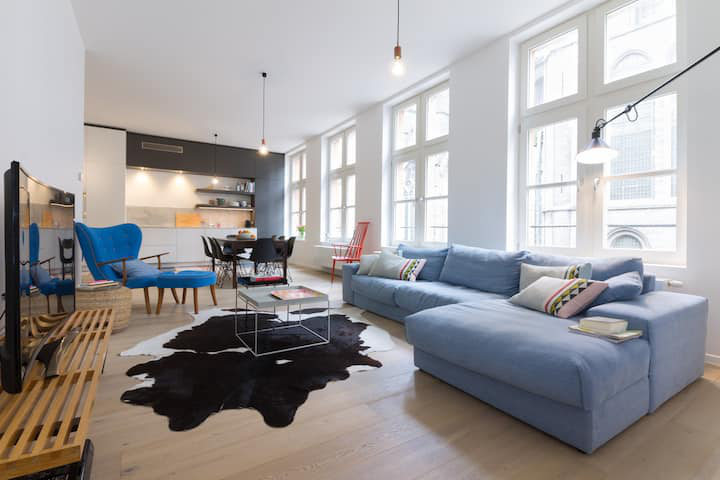

In [4]:
import mediapy as media

DATA_DIR = 'ProjectML/images/10015215/'  # Or any local path.
IMAGE = DATA_DIR + '0.jpg'

image2 = media.read_image(IMAGE)
media.show_image(image2, title='10015215 - image0')

In [5]:
!pip install os-sys


     |████████████████████████████████| 15.6 MB 5.4 MB/s 
     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 38.6 MB 12.4 MB/s 
     |████████████████████████████████| 209 kB 38.0 MB/s 
     |████████████████████████████████| 958 kB 13.7 MB/s 
     |████████████████████████████████| 15.5 MB 49.3 MB/s 
     |████████████████████████████████| 15.4 MB 6.2 MB/s 
     |████████████████████████████████| 15.4 MB 399 kB/s 
     |████████████████████████████████| 15.9 MB 512 kB/s 
     |████████████████████████████████| 15.4 MB 40.7 MB/s 
     |████████████████████████████████| 15.4 MB 2.3 MB/s 
     |████████████████████████████████| 14.2 MB 608 kB/s 
     |████████████████████████████████| 14.2 MB 9.8 MB/s 
     |████████████████████████████████| 12.2 MB 173 kB/s 
     |████████████████████████████████| 50.9 MB 3.6 kB/s 
     |████████████████████████████████| 51.8 MB 63 kB/s 
     |████████████████████████████████| 54.1 MB 79 kB/s 
     |█████████

In [ ]:
# dictionary = {}
# import os
# rootdir = 'ProjectML/images'

# teller=0

# for subdir, dirs, files in os.walk(rootdir):
#   dictionary[subdir[17:-1]] = []
#   for file in files:
    
#     image = media.read_image(os.path.join(subdir, file))
#     dictionary[subdir[17:-1]].append(image)
#   teller = teller+1
#   if teller > 5:
#     break


erin


In [6]:
from PIL import Image
from numpy import asarray 

dictio = {}
import os
rootdir = 'ProjectML/images'

teller=0

for subdir, dirs, files in os.walk(rootdir):
  dictio[subdir[17:]] = []
  for file in files:
    # convert('L') => grayscale
    image = Image.open(os.path.join(subdir, file))#.convert('L')
    data = asarray(image)
    dictio[subdir[17:]].append(data)
  teller = teller+1
  if teller > 200:
    break
    
dictio.pop('')


In [ ]:
# for i, images in dictio.items():
#   for image in images:
#     print(image)
    



In [7]:
import timeit
import matplotlib.pyplot as plt 
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import cifar100
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = cifar100.load_data()


169017344/169001437 [==============================] - 4s 0us/step


In [8]:
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [11]:
metaData = unpickle('ProjectML/meta')

print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [12]:

print('x_train shape:', x_train.shape)#data
print('y_train shape:', y_train.shape)#label
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

print(y_test)
#test = cifar100.load_batch();
#print(cifar100.fine_label[y_test[0][0]])


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]


In [13]:
#normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [14]:
#we denken 100
num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#batch size willekeurig getal, we're stealing it
batch_size = 128

In [15]:
import timeit
import matplotlib.pyplot as plt 
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import cifar10, cifar100
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [16]:
#build model functie
def build_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(100, activation='softmax'))
  return model

In [17]:
#wij gaan het met gpu doen, it's a thing
input_shape = x_train[0].shape

with tf.device('/gpu:0'):
    model = build_model()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=SGD(lr=0.01), metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=2,
              verbose=1,
              validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)
    print(score)

Epoch 1/2
391/391 [==============================] - 133s 336ms/step - loss: 4.6038 - accuracy: 0.0096 - val_loss: 4.5996 - val_accuracy: 0.0115
Epoch 2/2
391/391 [==============================] - 115s 292ms/step - loss: 4.5966 - accuracy: 0.0126 - val_loss: 4.5915 - val_accuracy: 0.0146
[4.591462135314941, 0.014600000344216824]


In [23]:
for x in dictio:
  print(x)
  break

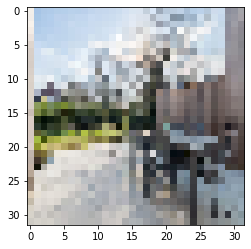

Predicted Result: 95
whale


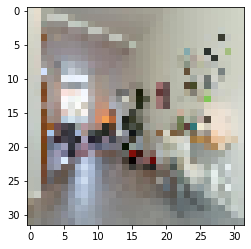

Predicted Result: 86
telephone


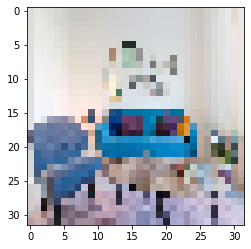

Predicted Result: 86
telephone


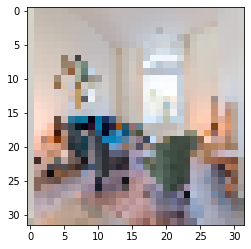

Predicted Result: 86
telephone


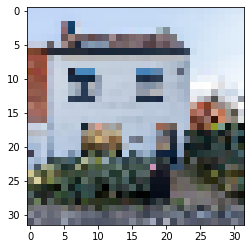

Predicted Result: 95
whale


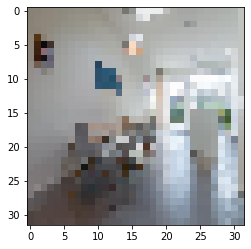

Predicted Result: 86
telephone


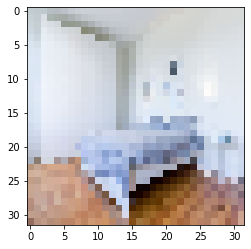

Predicted Result: 95
whale


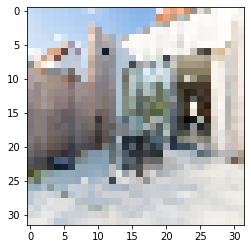

Predicted Result: 86
telephone


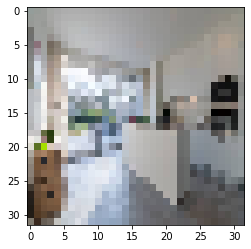

Predicted Result: 86
telephone


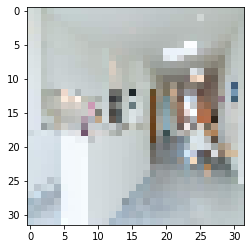

Predicted Result: 86
telephone


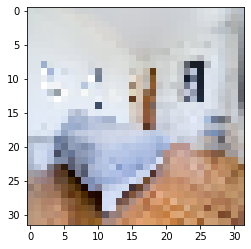

Predicted Result: 86
telephone


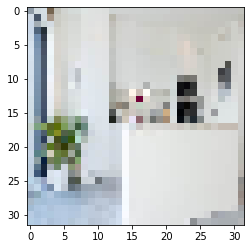

Predicted Result: 86
telephone


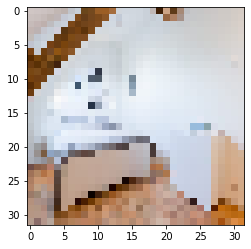

Predicted Result: 86
telephone


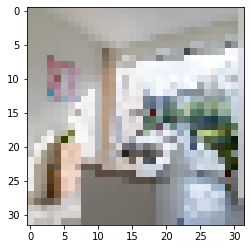

Predicted Result: 95
whale


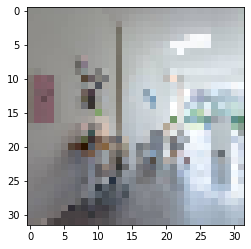

Predicted Result: 86
telephone


In [22]:
import cv2

for x in dictio['23298129']:
  image = cv2.resize(x,(32,32))
  img = np.expand_dims(image,axis=0)
  prediction = model.predict(img)[0]

  plt.imshow((img[0]).astype(np.uint8))
  plt.show()


  print("Predicted Result:", np.argmax(prediction))
  print(metaData['fine_label_names'][np.argmax(prediction)])

# Kamers herkennen

In [24]:
#ja

#de bron
# https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20House%20room%20type%20Claasification.ipynb
!pip install -U monk-colab


     |████████████████████████████████| 515 kB 5.3 MB/s 
     |████████████████████████████████| 1.3 MB 27.4 MB/s 
     |████████████████████████████████| 356.7 MB 26 kB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=8ae63fbdcbe11fa886af3bde16e4fc9f9d7e72c0000813e22dc816cf29bcbf1c
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [25]:
from monk.gluon_prototype import prototype


In [26]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv" -O cls_house_scene_trained.zip && rm -rf /tmp/cookies.txt


--2021-12-18 07:47:52--  https://docs.google.com/uc?export=download&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv
Resolving docs.google.com (docs.google.com)... 74.125.31.101, 74.125.31.102, 74.125.31.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.21K  --.-KB/s    in 0s      

2021-12-18 07:47:52 (11.3 MB/s) - written to stdout [3287]

--2021-12-18 07:47:52--  https://docs.google.com/uc?export=download&confirm=brfX&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv
Resolving docs.google.com (docs.google.com)... 74.125.31.139, 74.125.31.113, 74.125.31.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-84-docs.googleusercontent.com/docs/securesc/kqsr8nlcf18c0f2nt5b0tglef8s0v6nb/cetripc4iiu3d2d3ut

In [27]:
! unzip -qq cls_house_scene_trained.zip


In [28]:
ls workspace/Task


gluon_resnet18_v1/                   gluon-resnet18_v2/
gluon_resnet18_v1_train_all_layers/  gluon-resnet34_v1/


In [29]:
# Load project in inference mode

gtf = prototype(verbose=1);
gtf.Prototype("Task", "gluon_resnet18_v1_train_all_layers", eval_infer=True);

Mxnet Version: 1.8.0

Model Details
    Loading model - workspace/Task/gluon_resnet18_v1_train_all_layers/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Task
    Experiment: gluon_resnet18_v1_train_all_layers
    Dir: /home/ubuntu/workspace/Task/gluon_resnet18_v1_train_all_layers/



Prediction
    Image name:         ProjectML/images/10015215/0.jpg
    Predicted class:      living_room
    Predicted score:      0.9866869449615479



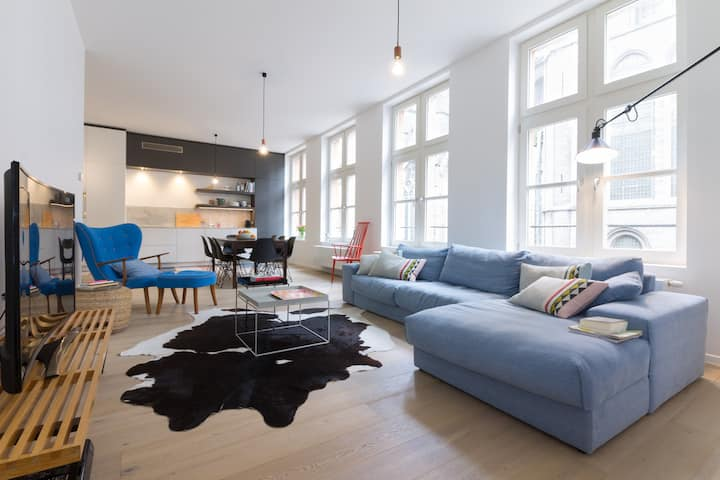

In [30]:
img_name = 'ProjectML/images/10015215/0.jpg'

predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name, height=300, width=300)

In [ ]:
for x in dictio:
  print(x)


41762765
45537662
33381936
18251661
21222837
3951890
12242630
38516966
44180302
41429865
38258643
8347942
22539464
14541839
21201872
41900526
6722473
26586044
26195752
9213284
12103538
11520446
19152623
42650113
36126903
19809622
39430324
32665151
26648638
24400600
43235666
34766513
42651793
23300768
35264564
19551628
43865396
2031176
39624011
19279395
50407960
39019516
48609851
18920831
14815080
14541530
20096647
15654068
23935662
30812042
30930573
19941444
17416518
23300438
17416354
36285608
24376390
29370078
44681758
23730534
22581838
45932355
14420137
33061263
30033166
39581213
47209900
47918373
1354090
3771542
17415990
45250457
4591763
15098520
36062226
39349156
13839827
13888897
46481223
43044239
36992778
23837044
20491275
43458159
47728709
12104123
45748440
27915686
24361777
43525279
38813297
15912167
45704924
21194829
49527262
26094960
44080279
45307802
19645720
6810537
25939297
42013763
36873204
45522653
8766948
40463672
29936489
11939475
39286787
45108222
41210475
36516126
2

Prediction
    Image name:         ProjectML/images/6722473/1.jpg
    Predicted class:      living_room
    Predicted score:      0.7603467702865601



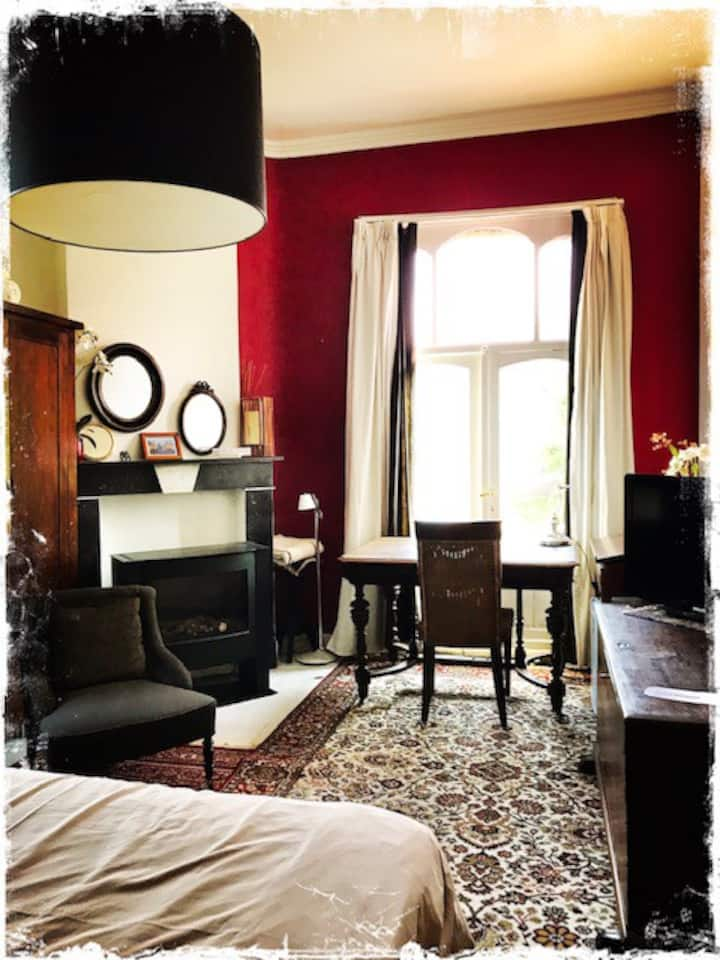

In [53]:
img_name = 'ProjectML/images/6722473/1.jpg'

predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name, height=300, width=300)

Prediction
    Image name:         ProjectML/images/30731985/0.jpg
    Predicted class:      living_room
    Predicted score:      0.9471278190612793



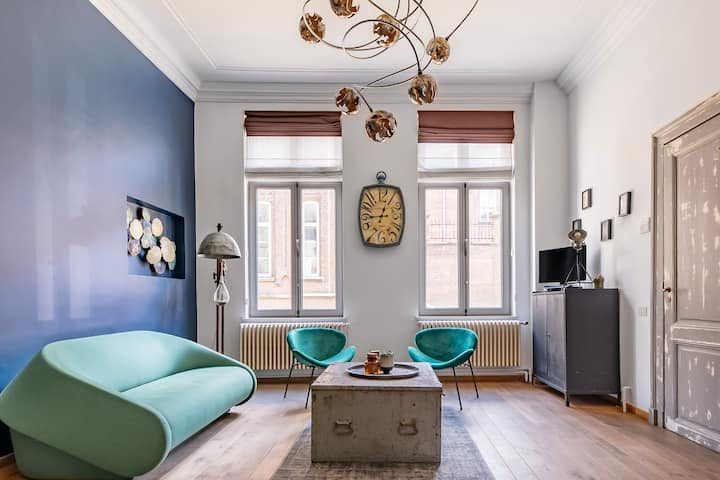

Prediction
    Image name:         ProjectML/images/30731985/1.jpg
    Predicted class:      bedroom
    Predicted score:      0.9940249919891357



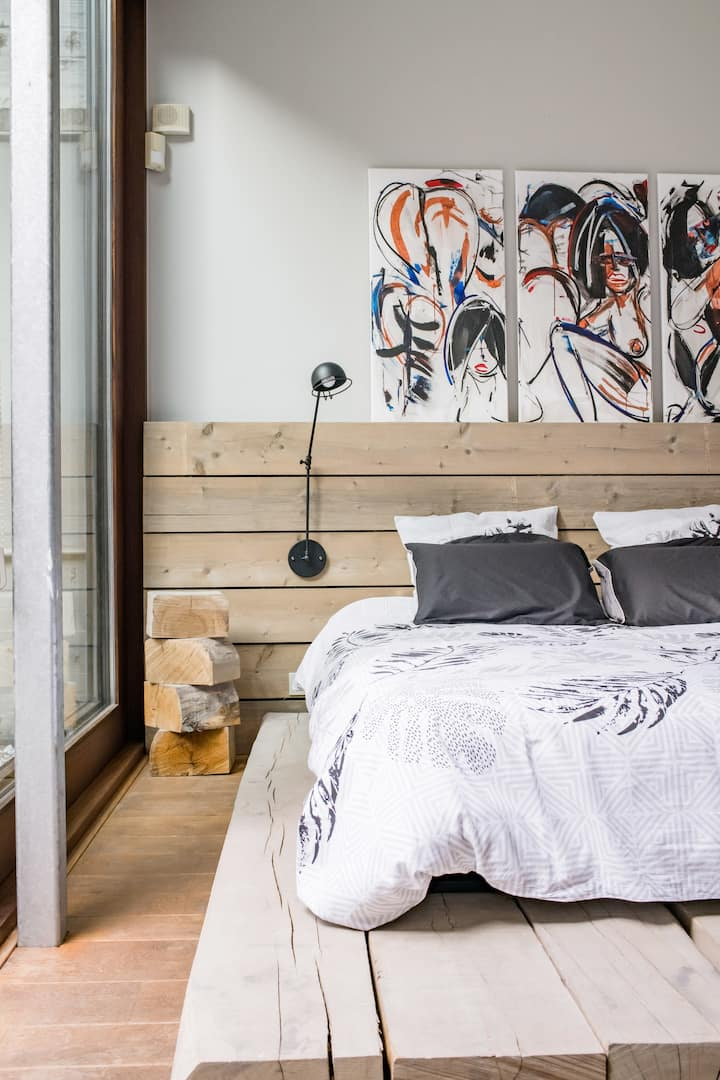

Prediction
    Image name:         ProjectML/images/30731985/2.jpg
    Predicted class:      bedroom
    Predicted score:      0.5429884791374207



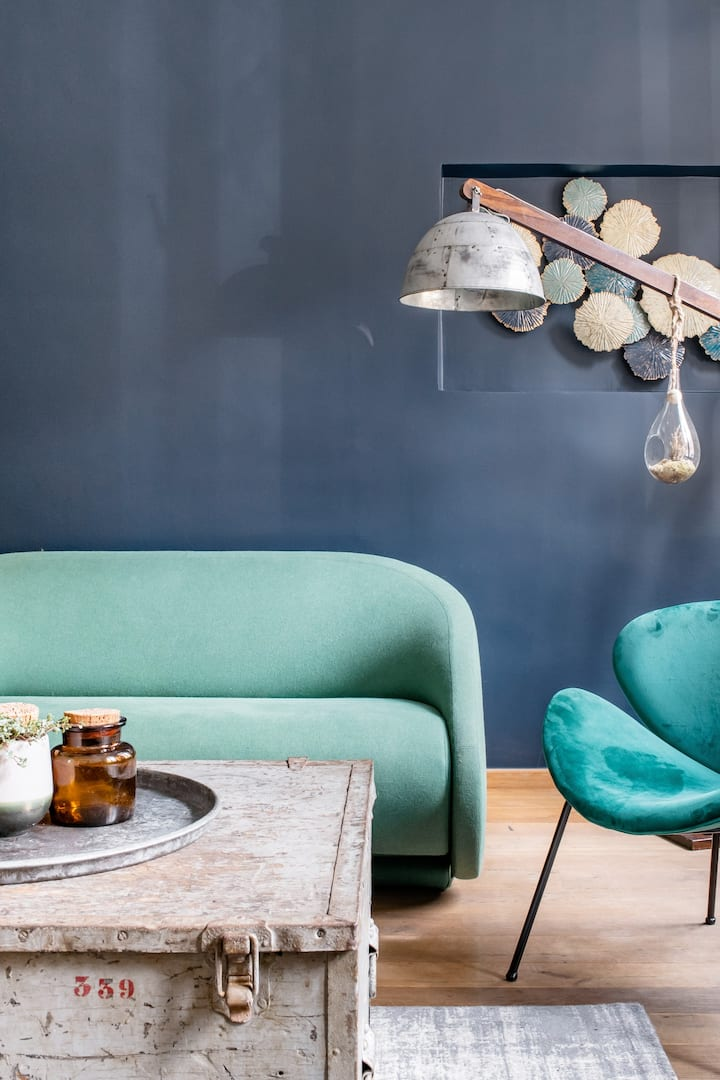

Prediction
    Image name:         ProjectML/images/30731985/3.jpg
    Predicted class:      living_room
    Predicted score:      0.8546127080917358



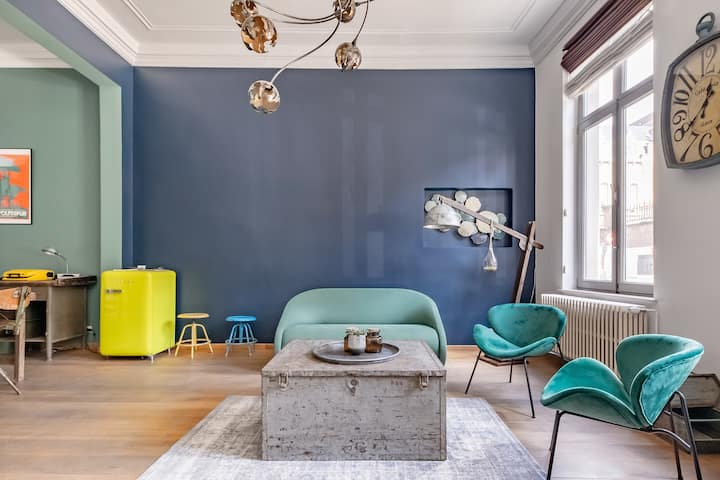

Prediction
    Image name:         ProjectML/images/30731985/4.jpg
    Predicted class:      dining_room
    Predicted score:      0.43178147077560425



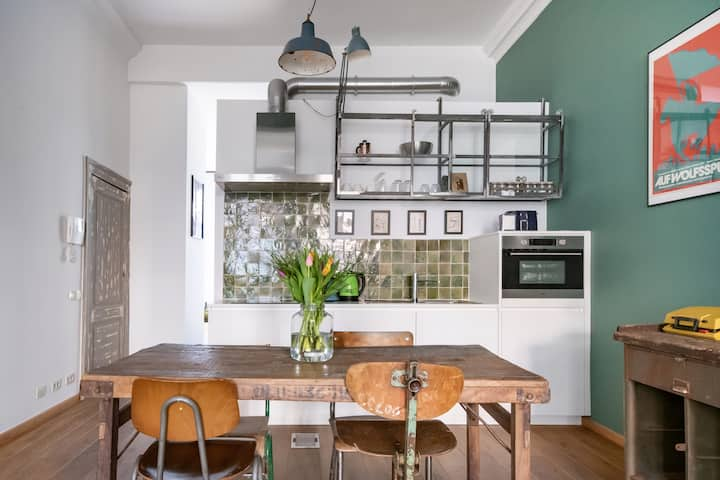

Prediction
    Image name:         ProjectML/images/30731985/5.jpg
    Predicted class:      bathroom
    Predicted score:      1.0



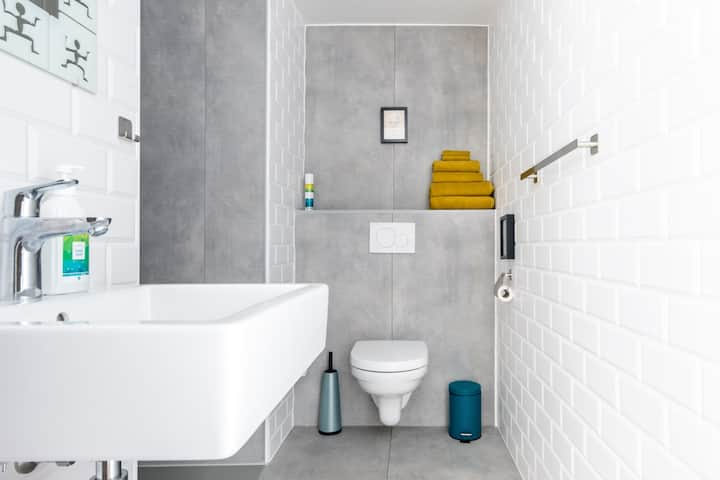

Prediction
    Image name:         ProjectML/images/30731985/6.jpg
    Predicted class:      Exterior
    Predicted score:      0.40917590260505676



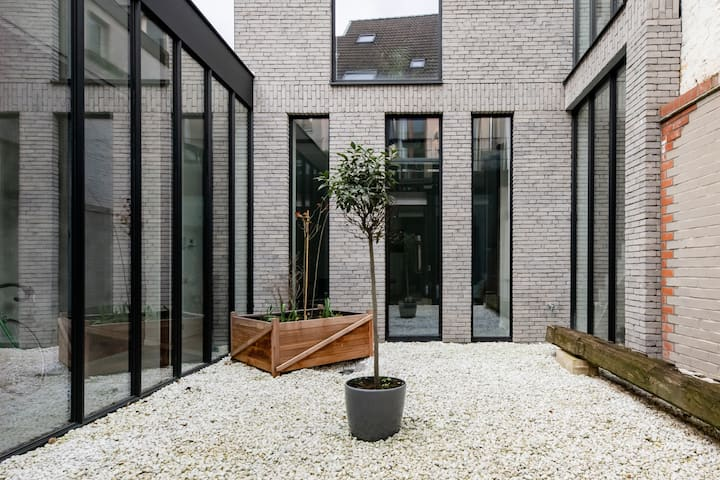

Prediction
    Image name:         ProjectML/images/30731985/7.jpg
    Predicted class:      bedroom
    Predicted score:      0.9992545247077942



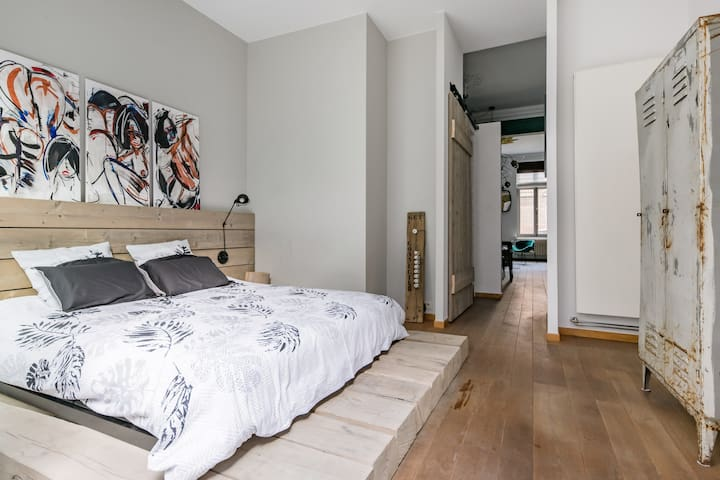

Prediction
    Image name:         ProjectML/images/30731985/8.jpg
    Predicted class:      bedroom
    Predicted score:      0.9954612255096436



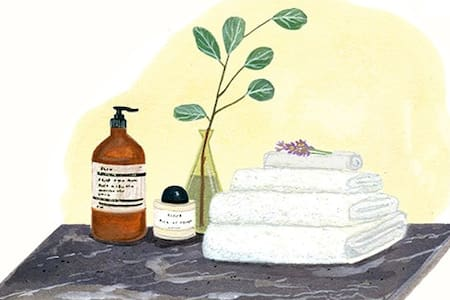

Prediction
    Image name:         ProjectML/images/30731985/9.jpg
    Predicted class:      living_room
    Predicted score:      0.4993206262588501



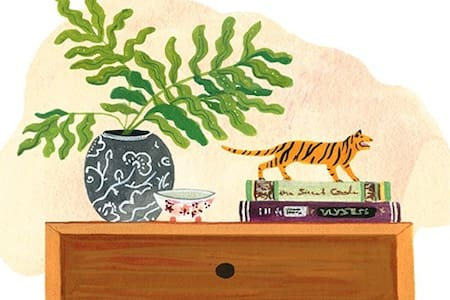

In [61]:
from IPython.display import Image
for x in range(10):
  img_name = 'ProjectML/images/30731985/'+str(x)+'.jpg'

  predictions = gtf.Infer(img_name=img_name);
  display(Image(filename=img_name, height=300, width=300))

In [35]:
! pip install pycocotools

In [37]:
! pip install pixellib

     |████████████████████████████████| 430 kB 3.3 MB/s 
     |████████████████████████████████| 156 kB 31.7 MB/s 
     |████████████████████████████████| 49 kB 2.5 MB/s 
     |████████████████████████████████| 8.3 MB 8.4 MB/s 
     |████████████████████████████████| 74 kB 2.0 MB/s 
     |████████████████████████████████| 145 kB 30.5 MB/s 
     |████████████████████████████████| 843 kB 9.9 MB/s 
     |████████████████████████████████| 596 kB 10.3 MB/s 
     |████████████████████████████████| 112 kB 8.6 MB/s 
     |████████████████████████████████| 317 kB 46.3 MB/s 
     |████████████████████████████████| 59.9 MB 1.4 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=51ff17e4b520729c84c05f7c315628f7a2546ab076a417d42f68de670b4d4e13
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab6263c719120e06b28f3378af59b52ce7a20e81852
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl siz

In [67]:
import pixellib
from pixellib.torchbackend.instance import instanceSegmentation

name = '30731985'

for x in range(9):
  img_name = 'ProjectML/images/' + name + '/'+str(x)+'.jpg'
  ins = instanceSegmentation()
  ins.load_model("ProjectML/pointrend_resnet50.pkl")
  ins.segmentImage(img_name, show_bboxes=True, output_image_name="output_image.jpg")
  display(Image(filename="output_image.jpg", height=300, width=300))



The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


IndexError: ignored

Dit is voor 1 gebruiker dus maakt het eigenlijk niet uit dat het vrij lang duurt. De mensen moeten maar geduld hebben he zeg

In [ ]:
amenities = {}

i = 0

for listing in dictio:
  i = i + 1
  amenities[listing] = set()
  for picture in range(len(dictio[listing])):
    img_name = 'ProjectML/images/' + listing + '/'+str(picture)+'.jpg'
    ins = instanceSegmentation()
    ins.load_model("ProjectML/pointrend_resnet50.pkl")
    info = ins.segmentImage(img_name, show_bboxes=True, output_image_name="output_image.jpg")
    # display(Image(filename="output_image.jpg", height=300, width=300))
    ams = info[0]['class_names']
    scores = info[0]['scores'].numpy()
    for j in range(len(ams)):
      if scores[j] < 70:
        break
      amenities[listing].add(ams[j])
  
  if i >= 2:
    print("genoeg he jongens")
    break



In [105]:
amenities

{'23298129': {'bed',
  'bottle',
  'bowl',
  'chair',
  'couch',
  'dining table',
  'knife',
  'microwave',
  'oven',
  'person',
  'potted plant',
  'sink',
  'suitcase',
  'vase'},
 '38942469': {'bed',
  'book',
  'bottle',
  'bowl',
  'chair',
  'couch',
  'knife',
  'oven',
  'potted plant',
  'tv'}}